# How do attendance and homework scores impact course grades?

Glenn Bruns, CSUMB

It's interesting to look at how absences and missing homework assignments relate to course grades.

I created a data set by taking grade information from a section of CST 383 from a couple of years ago, anonymizing the data, and then randomizing the data a little.  So this data is not real, but the results you'll get will be similar to what you'd get with the real data.

Every row in the dataset represents a student.  The columns give average scores for things like homework, quizzes, and projects, the total score for the course, the number of absences, and the number of homework assignments not turned in.  (I treated homework assignments with very low scores as missing homework assignments.)

### Instructions (read carefully)

- After each problem, enter your code in the cell below.  Never modify dataframe df.

- Do not modify any other cells, except for the cell below that specifies the default plot size.  Don't add any import statements.

- Try to produce the same output as in the sample output.  This includes text in printed probabilities, and titles, axis labels, etc., in plot.

- If a cell contains plotting statements, but sure to add a semi-colon after the last plotting statement in the cell.

- Points will be deducted for code that is untidy or achieves the result in a strange way.  All output values must be computed.

- Be sure to run your notebook from top to bottom before submitting.  A significant penalty will be applied if not.

v0.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

#### Set plotting options

In [2]:
# see https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_theme(style='whitegrid', context='notebook')

You may need to modify the code in this cell, depending on your device.

In [3]:
# default plot size
rcParams['figure.figsize'] = 5,3

### Read the data

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/fake-grades.csv')

df_cont is a data frame containing only the continuous variables in df.  These variables are on about the same scale.

In [5]:
df_cont = df[['Homework', 'Quizzes', 'Projects', 'Final', 'Total']]

Add a variable giving the ratio of homework scores to quiz scores.

In [6]:
df['HW_Quiz_Ratio'] = df['Homework'] / df['Quizzes']

### Basic exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number_days_missed  38 non-null     int64  
 1   Number_hw_missed    38 non-null     int64  
 2   Homework            38 non-null     int64  
 3   Quizzes             38 non-null     int64  
 4   Projects            38 non-null     int64  
 5   Final               38 non-null     int64  
 6   Total               38 non-null     int64  
 7   HW_Quiz_Ratio       38 non-null     float64
dtypes: float64(1), int64(7)
memory usage: 2.5 KB


In [8]:
df.describe()

,Number_days_missed,Number_hw_missed,Homework,Quizzes,Projects,Final,Total,HW_Quiz_Ratio
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,1.710526,2.236842,82.105263,74.000000,81.947368,83.342105,82.578947,1.124710
std,1.829309,2.341566,16.859979,12.642699,11.608355,11.060708,9.350911,0.240406
min,0.000000,0.000000,42.000000,48.000000,35.000000,56.000000,58.000000,0.736842
25%,0.000000,0.250000,69.250000,70.000000,77.250000,77.250000,76.000000,0.937859
50%,1.000000,1.500000,85.000000,73.500000,83.500000,83.500000,85.000000,1.103943
75%,3.000000,3.750000,96.000000,80.750000,89.000000,92.000000,89.000000,1.320900
max,7.000000,10.000000,103.000000,99.000000,96.000000,99.000000,99.000000,1.645833


We see that the median total course score in this semester was 85, and the mean was 82.6.

The average value of homework/quiz ratio was about 1.1, meaning most students did a little better on homework assignments than quizzes.  The homework/quiz ratio values range from about 0.74 to about 1.65.

#### Problem 1

What is the distribution of course scores?

Create a histogram of variable Total, which is the score for the class.

Be sure to include a sensible title and x axis label.  (For histograms a custom y axis label is not needed, because it will always be counts.)

I like to start the title with a capital letter, but to use all lower-case letters in my axis labels.  You can start the axis labels with capital letters if you prefer.

Create your plot using Pandas.

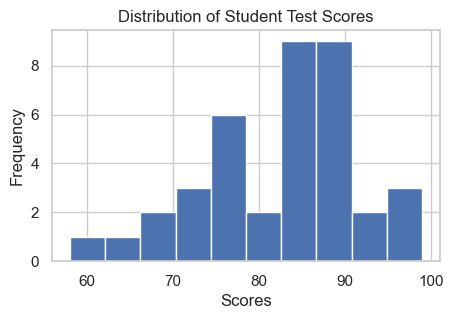

In [9]:
df['Total'].plot.hist()
plt.xlabel('Scores')
plt.title("Distribution of Student Test Scores");

The histogram appears to show a large group of students that got a course score of about 85 to 90, and another group of students with scores between about 60 and 80.

#### Problem 2

How does the distribution of course scores appear if we use a density plot?

Create a density plot of variable Total. A density plot is like a smoothed histogram.

Be sure to include a sensible title and x axis label.  (For density plots a custom y axis label is not needed, because it will always be counts.)

Create your plot using Pandas, using plot.density().

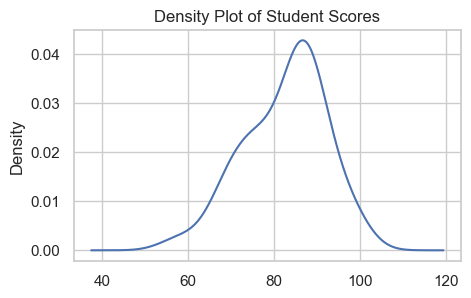

In [10]:
df['Total'].plot.density(xlabel='Scores', title='Density Plot of Student Scores');

The left of the two bumps in the histogram is not really apparent in the density plot.



#### Problem 3

The ratio of homework scores to quiz scores is interesting, because if a student diligently works on homework assignments, you'd expect that student to do well on quizzes.

Produce a histogram of the homework/quiz ratio values.

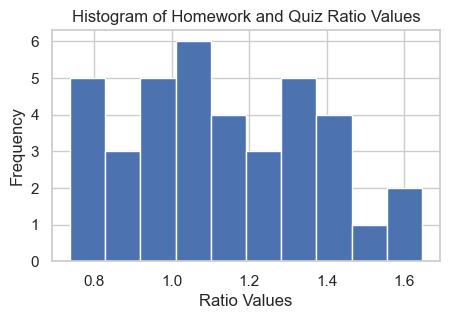

In [11]:
df['HW_Quiz_Ratio'].plot.hist(xlabel='Ratio Values', title='Histogram of Homework and Quiz Ratio Values');

It is much more common for homework scores to be higher than quiz scores than vice versa.  

#### Problem 4

We can give a brief summary of the distribution of *all* the quantitative variables with a Pandas multi-box plot.

However, this style plot only works well when all the variables have about the same range.

Create a Pandas multi-box plot showing a box plot for each variable in df_cont.

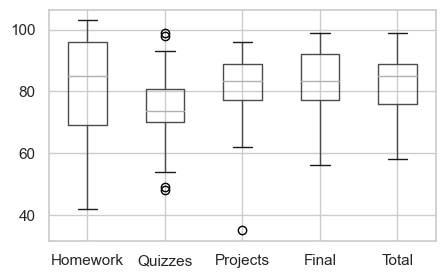

In [12]:
df_cont.boxplot();

This is interesting; we see that quiz scores were lower, on average, than homework and project scores.  Also, the course total score is higher than most of the component scores.  That is probably because there are other components of the total score, like the learning logs.

Also, we see lots of outliers in the quiz scores.

So far we've only looked at the continuous variables in the data set.  Let's now look at the discrete variables.


#### Problem 5

Did students tend to miss a lot of days of class?

Use a bar plot to plot the number of occurrences of each value of Number_days_missed in the dataset.

Use value_counts() to get the number of occurences.

The bars should appear in order of number of absences.  To do this, you can sort the result of value_counts().  There are two main Pandas methods for sorting a series: .sort_values() and .sort_index().

<Axes: xlabel='Number_days_missed'>

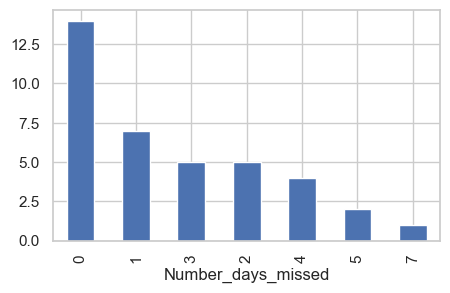

In [13]:
df['Number_days_missed'].value_counts().plot.bar()

#### Problem 6

What are the probabilities for each number of absences?

Create a probability mass function (PMF) plot for variable Number_days_missed, where the probabilities are estimated from the data.  Use a bar plot.

As in the last problem, the number of absences should increase on the x axis.

You will again use value_counts(), but use the 'normalize' parameter.

<Axes: xlabel='Number_days_missed'>

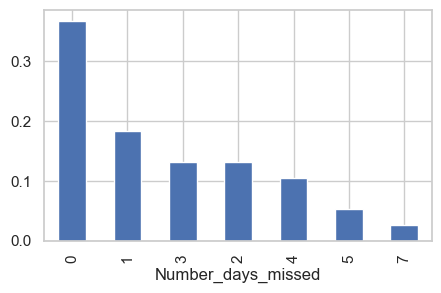

In [14]:
df['Number_days_missed'].value_counts(normalize=True).plot.bar()

#### Problem 7

What is the probability of 4 absences or less?  It will be easy to see if we plot the cumulative distribution function (CDF).

Repeat the previous problem, but this time plot the CDF.

Don't forget function cumsum().

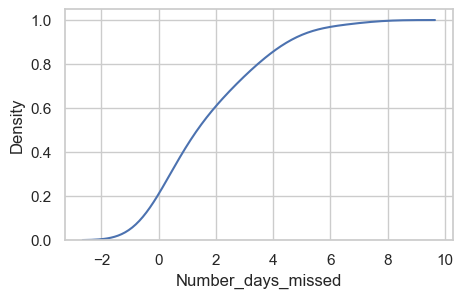

In [15]:

sns.kdeplot(data=df["Number_days_missed"], cumulative=True);

#### Problem 8

What is the probability of missing a certain number of homework assignments?

Create a PMF plot for variable Number_missing_hw.

The number of missing HW assignments should increase on the x axis.

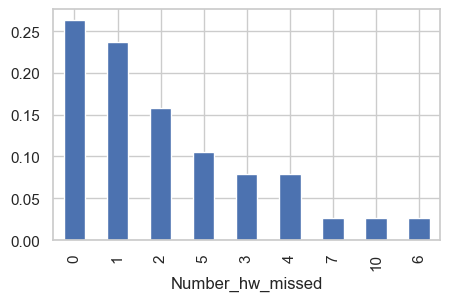

In [16]:
df['Number_hw_missed'].value_counts(normalize=True).plot.bar();

We've looked at all of the variables in the data set individually.  Let's now look at how the continuous variables like Homework and Quizzes related to each other.

#### Problem 9

How do homework scores relate to quiz scores?

Create a scatterplot with Homework on the x-axis and Quizzes on the y-axis.

<Axes: xlabel='Homework', ylabel='Quizzes'>

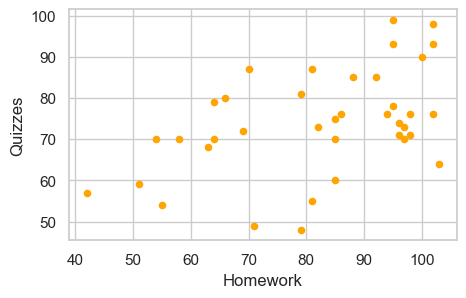

In [17]:
df.plot.scatter(x='Homework', y='Quizzes', c='orange')

Not surprisingly, higher homework scores are associated with higher quiz scores.

#### Problem 10

How do project scores relate to quiz scores?

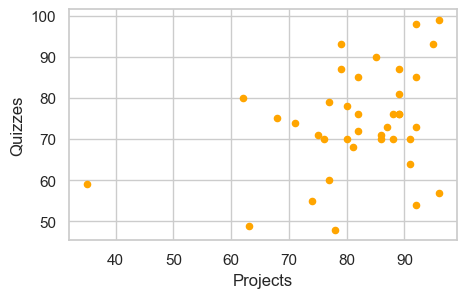

In [18]:
df.plot.scatter(x='Projects', y='Quizzes', c='orange');


Higher project scores are also associated with higher quiz scores.  The scatterplot also shows an interesting outlier: a very low project score.

#### Problem 11

How does homework/quiz ratio relate to total course score?  

Create a scatter plot with homework/quiz ratio on the x axis and total course score on the y axis.

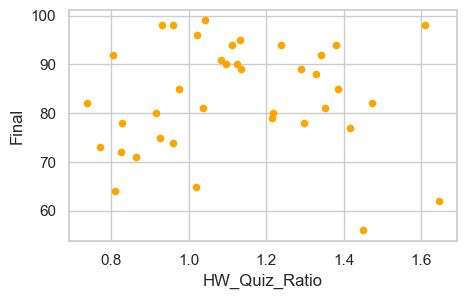

In [19]:
df.plot.scatter(x='HW_Quiz_Ratio', y='Final', c='orange');

#### Problem 12

It's hard to tell if there is a relationship between HW/Quiz ratio and total course score.  It looks like both low and high values of hw/quiz ratio ae associate with somewhat lower grades.

Students with the highest total scores tended to have HW/quiz ratios close to 1.

It's very interesting that students who did better on quizzes than on homework tended to have lower total scores.  Perhaps these students had low homework scores, as opposed to high quiz scores.

Create another scatterplot, like the previous one, but this time include a regression line.

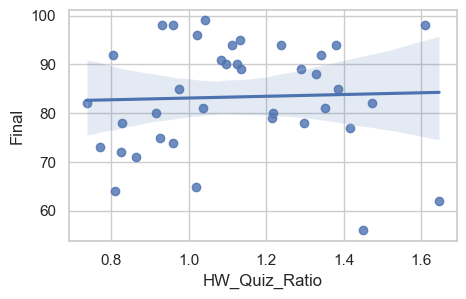

In [20]:
sns.regplot(data=df, x='HW_Quiz_Ratio', y='Final');

There is no strong linear relationship.  The line angles up slightly, but the shaded area gives an idea of the uncertainty about the line.  The shaded ae is large, so our confidence that the relationship is positive is low.

#### Problem 13

To see relationships between all pairs of continuous variables, create a Seaborn "pairplot" using the variables in df_cont.  

The size of the pairplot can be controlled using parameter 'height'.

/Users/tyrellbaker/anaconda3/envs/Hw_Redo_20231003/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


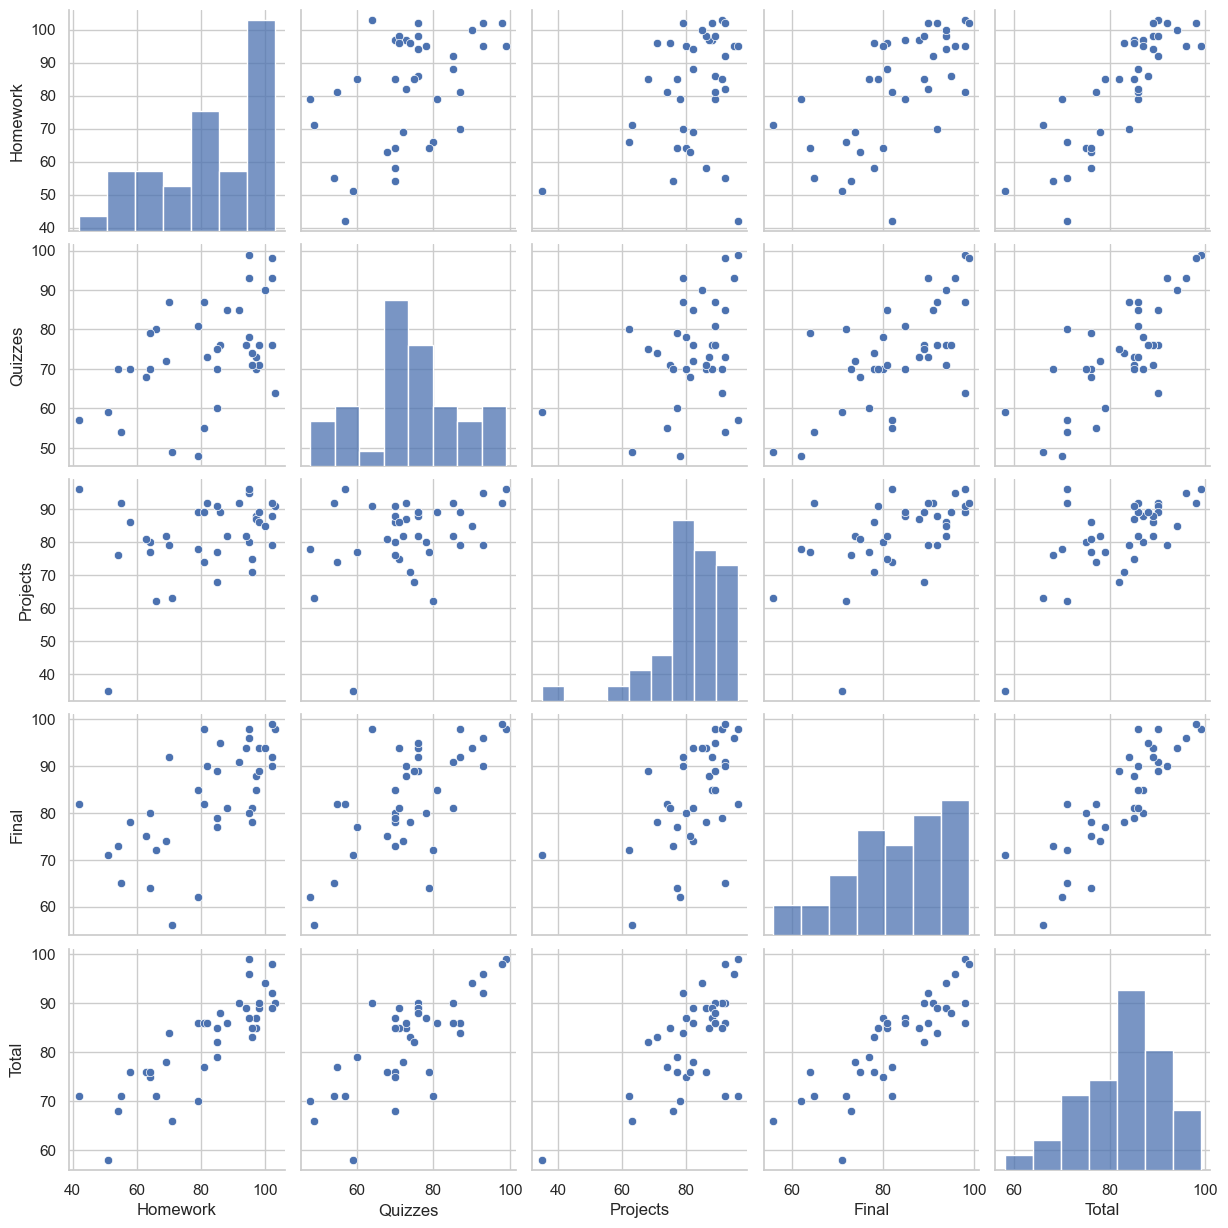

In [21]:
sns.pairplot(data=df_cont)


#### Problem 14

To get a more quantitative feel for the relationships between the continuous variables, output the correlation coefficients between the continuous variables.

A print statement is not needed.  In fact, in a Jupyter notebook, the output will look better if a print statement is not used.

Use round() to keep only 2 digits to the right of the decimal point.

In [22]:
round(df_cont.corr(), 2)

,Homework,Quizzes,Projects,Final,Total
Homework,1.00,0.47,0.33,0.63,0.84
Quizzes,0.47,1.00,0.34,0.67,0.75
Projects,0.33,0.34,1.00,0.53,0.65
Final,0.63,0.67,0.53,1.00,0.84
Total,0.84,0.75,0.65,0.84,1.00


#### Problem 15

Plot the correlation coefficients between the quantitative variables.

Use the 'jet' color map, and use -1 and 1 as the min and max legend values.

Don't use any rounding in this problem.

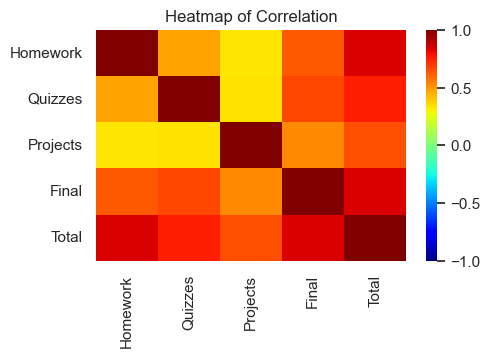

In [23]:
sns.heatmap(df_cont.corr(), cmap='jet', vmin=-1, vmax=1)
plt.title("Heatmap of Correlation");

Excluding the total score, we see that the final and quiz scores are strongly positively correlated.  The weakest correlation shown is between project scores and homework or quiz scores.

### Basic statistics

#### Problem 16

What is the average total class score?

Write code to compute the mean value from the data and print it.

Print using 1 digit to the right of the decimal point.  Use an f-string for the formatting.

In [24]:
print(f"{df['Total'].mean():.1f}");

82.6


#### Problem 17

What is the median class score?  Is it very different from the mean?

Repeat the previous problem, but with the median.

In [25]:
print(f"{df['Total'].median():.1f}");

85.0


#### Problem 18

What is the standard deviation of the class score?

Repeat the previous problem, but with standard deviation.  Print two digits to the right of the decimal point in this problem, again using an f-string.

In [26]:
print(f"{df['Total'].std():.2f}");


9.35


#### Problem 19

Are the course total scores more spread out than the course project scores?

Repeat the previous problem, but with total project score instead of total course score.  Using an f-string, print the result with 3 significant digits.

In [27]:
print(f"{df['Projects'].std():.3f}");

11.608


#### Problem 20

How do the standard deviations for all course projects and assignments compare?

We can see this with the output of .describe(), but I want you to compute it using simple aggregation and then plot the values with a bar plot.

Plot the standard deviation for all columns of df_cont.  List the components in the same order as they appear in dataframe df.

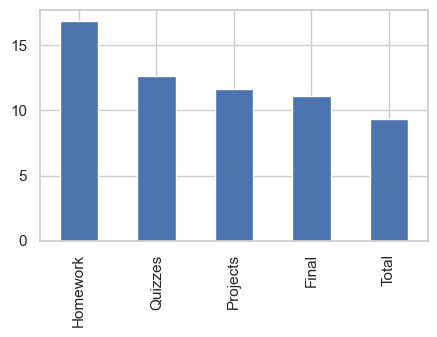

In [28]:
df_cont.std().plot.bar();

It is interesting that homework values vary much more than total course scores.  Perhaps this is because everyone finishes quizzes and the final, but not everyone finishes homework assignments.

### Estimated probabilities

#### Problem 21

What's the probability of passing?  In other words, of having a course total >= 70.

Estimate P(Total >= 70) from the data and print it.  It's a marginal probability.  Remember, all probability values are between 0 and 1.  Format with three significant digit using an f-string when printing.

In [29]:
print(f"{(df['Total'] >= 70).mean():.3f}")

0.921


#### Problem 22

What's the probability of getting an A?  In other words, of having a course total of at least 90.

Repeat the previous problem but using 90 instead of 70.

In [30]:
print(f"{(df['Total'] >= 90).mean():.3f}")

0.211


#### Problem 23

What's the probability of being absent more than twice?  

Print the estimated value of P(Number_days_missed > 2).  As usual, use three significant digits when you print.

In [31]:
print(f"{(df['Number_days_missed'] > 2).mean():.3f}");

0.316


#### Problem 24

How do absences and missing homework assignments related to course score?  This is the main question we're interested in.

What's the probability of passing the course and missing more than two days and passing the course?  

This is the joint probability P(Total >= 70, Number_days_missed > 2).  Print your answer.

In [32]:
print(f"{((df['Total'] >= 70) & (df['Number_days_missed'] > 2)).mean():.3f}");

0.263


#### Problem 25

A similar question is: what's the probability of passing the course **given** absences on more than two days.

This is the conditional probability P(Total >= 70 | Number_days_missed > 2).  Compute and then print your answer.

In [33]:
print(f"{((df['Total'] > 70) & (df['Number_days_missed'] > 2)).mean()/ (df['Number_days_missed'] > 2).mean():.3f}");

0.750


#### Problem 26

The probability of passing with more than two absences is pretty high, but lower than the marginal probability of passing the class.

What's the probability of passing the class with no absences?

Print P(Total >= 70 | Number_days_missed = 0).

In [34]:
print(f"{((df['Total'] >= 70) & (df['Number_days_missed'] == 0)).mean() / (df['Number_days_missed'] == 0).mean():.3f}")

1.000


#### Problem 27

In this section, everyone who never missed class passed.

What's the probability of getting an A with more than 2 absences?

Print P(Total >= 90 | Number_days_missed > 2).

In [35]:
print(f"{((df['Total'] >= 90) & (df['Number_days_missed'] > 2)).mean() / (df['Number_days_missed'] > 2).mean():.3f}")


0.000


#### Problem 28

We learned that no one with than two absences passed the class.

Let's look now at missed homework assignments.  What's the probability of passing with 2 or more missing homework assignments?

Print P(Total >= 70 | Number_hw_missed > 2).

In [37]:
print(f"{((df['Total'] >= 70) & (df['Number_hw_missed'] > 2)).mean() / (df['Number_hw_missed'] > 2).mean():.3f}")

0.769


#### Problem 29

We've looked at the probability of passing more than 2 missing homework assignments.

What about the probability of missing 2 or more homework assignments given that a student passes the class?  Do you expect this probability value to be the same?

Print P(Number_hw_missed > 2 | Total >= 70).

In [40]:
print(f"{((df['Number_hw_missed'] > 2) & (df['Total'] >= 70)).mean() / (df['Total'] >= 70).mean():.3f}")

0.286


Do you have a good feel for the difference between P(Total >= 70 | Number_hw_missed > 2) and P(Number_hw_missed > 2 | Total >= 70)?

#### Problem 30

Is seems that not doing a homework assignment is more of a problem than being absent once.  That's what I would expect.

What's the probability of getting an A with 2 or more missing homework assignments?

Print P(Total >= 90 | Number_hw_missed > 2).

In [41]:
print(f"{((df['Total'] >= 90) & (df['Number_hw_missed'] > 2)).mean() / (df['Number_hw_missed'] > 2).mean():.3f}");

0.000


The homework score is a big component of the final course score, so this is not surprising.

#### Problem 31

Instead of computing probabilities, let's look at the distribution of grades for those with more than 2 absences, and for those with no more than 2 absences.

First, create a density plot for the variable Total, but only use the rows of the data in which there are more than two absences.

Use 40-110 as the x axis limits.  

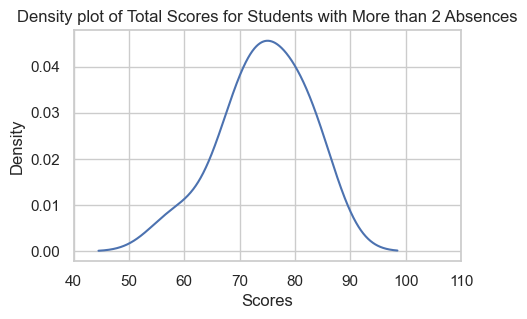

In [50]:
df[df['Number_days_missed'] > 2] ['Total'].plot.density(xlim=(40, 110))
plt.xlabel('Scores')
plt.title("Density plot of Total Scores for Students with More than 2 Absences");

#### Problem 32

Now create a density plot for the variable Total, but only use the rows of the data in which there are no more than two absences.

Again, use 40-110 as the x axis limits. Using the same x axis range on the two plots will make them easier to compare.

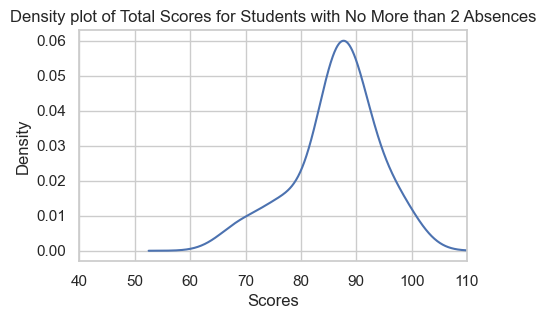

In [51]:
df[df['Number_days_missed'] <= 2] ['Total'].plot.density(xlim=(40, 110))
plt.xlabel('Scores')
plt.title("Density plot of Total Scores for Students with No More than 2 Absences");

#### Problem 33

To make comparison of the distributions easier, they can be plotted in the same plot.

Create a new plot showing the two densities of the last two plots.  Refer to the 'plotting basics' slides for information on creating a legend.  The Pandas density() method accepts a 'label' parameter.

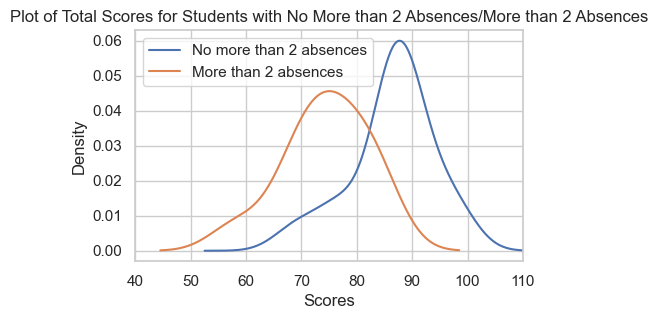

In [54]:
df[df['Number_days_missed'] <= 2]['Total'].plot.density(xlim=(40, 110))
df[df['Number_days_missed'] > 2]['Total'].plot.density(xlim=(40, 110))
plt.xlabel('Scores')
plt.title("Plot of Total Scores for Students with No More than 2 Absences/More than 2 Absences")
plt.legend(['No more than 2 absences', 'More than 2 absences']);

Having more than two absences has a big impact on the course grade.  However, note that part of the course grade is a participation component, which is affected by absences.  

#### Problem 34

What about the combination of missing class and missing homework assignments?  Is missing class *and* missing homework assignments particularly bad?

Print P(Total >= 70 | (Num_hw_missed > 2 and Number_days_missed > 2))

In [47]:
print(f"{((df['Total'] >= 70) & (df['Number_hw_missed'] > 2) & (df['Number_days_missed'] > 2)).mean() / ((df['Number_hw_missed'] > 2) & (df['Number_days_missed'] > 2)).mean():.3f}")

0.714


#### Problem 35

Did people who got A's on their projects get an A in the class?

What's the probability of getting an A in the class given an average project score of A?

Print P(Total >= 90 | Projects >= 90)

In [48]:
print(f"{((df['Total'] >= 90) & (df['Projects'] >= 90)).mean() / (df['Projects'] >= 90).mean():.3f}")

0.556


More than half of the people who got A's on their projects got A's in the class, but this is partly because the project grade is a big part of the total grade.

#### Problem 36

Write one paragraph describing some of the specific things you learned about the grades in the class.

Please focus on what you learned about the subject of the data -- the grades from a section of 383 -- and not on the tools we used, what you learned about writing Pandas code, etc.

Put your text in the markdown cell below.

I learned that it's impoprtant not to miss homework assignments, and that the reasoning for that could be multifaceted. The most likely reason, though, is because missing homework means a lack of practice which likely results in lower scores in other areas of the class. I also learned that as long as absences remain at or below the given threshold of 2, grades are relatively unaffected by the absences. However, when those absences are combined with other factors like missing homework or lower project scores, the likelihood of getting an A decreases drastically. Finally, I learned that at least in this dataset, no one that missed more than 2 homework assignments got an A, further emphasizing the importance of completing the assignments.